# Characterization of Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Convolution

The convolution is an important operation in the theory of signals and systems, as shown in the previous Section. It also shows up in a wide range of other physics and mathematical problems. The operation is therefore of general interest and well known in mathematics. The properties of the convolution are reviewed, followed by a widely used graphical interpretation of the operation.

The convolution of two signals $s(t)$ and $g(t)$ is defined as

\begin{equation}
s(t) * g(t) = \int_{-\infty}^{\infty} s(\tau) \cdot g(t - \tau) \; d\tau = 
\int_{-\infty}^{\infty} s(t - \tau) \cdot g(\tau) \; d\tau
\end{equation}

where $*$ is a common short-hand notation of the convolution. 

### Properties

For the signals $s(t)$, $g(t)$, $h(t) \in \mathbb{C}$ the convolution shows the following properties 

1. The Dirac impulse is the [identity element](https://en.wikipedia.org/wiki/Identity_element) of the convolution
    \begin{equation}
    s(t) * \delta(t) = s(t)
    \end{equation}

2. The convolution is [commutative](https://en.wikipedia.org/wiki/Commutative_property)
    \begin{equation}
    s(t) * g(t) = g(t) * s(t)
    \end{equation}

3. The convolution is [associative](https://en.wikipedia.org/wiki/Associative_property)
    \begin{equation}
    \left[ s(t) * g(t) \right] * h(t) = s(t) * \left[ g(t) * h(t) \right] 
    \end{equation}

5. The convolution is [distributive](https://en.wikipedia.org/wiki/Distributive_property)
    \begin{equation}
    s(t) * \left[ g(t) + h(t) \right] = s(t) * g(t) + s(t) * h(t)
    \end{equation}

5. Multiplication with a scalar $a \in \mathbb{C}$
    \begin{equation}
    a \cdot \left[ s(t) * g(t) \right] = \left[ a \cdot s(t) \right] * g(t) = s(t) * \left[ a \cdot g(t) \right]
    \end{equation}

6. Derivative of the convolution
    \begin{equation}
    \frac{d}{dt} \left[ s(t) * g(t) \right] =  \frac{d s(t)}{dt} * g(t) = s(t) * \frac{d g(t)}{dt}
    \end{equation}

The first property is a consequence of the sifting property of the Dirac pulse, the second to fifth property can be proven by considering the definition of the convolution integral and the sixth property follows from the properties of the derivative of the Dirac delta function.

### Graphical Interpretation

The convolution is commonly [interpreted in a graphical manner](https://en.wikipedia.org/wiki/Convolution#Visual_explanation). This interpretation provides valuable insights into its calculation and allows to derive a first estimate of the result. The calculation of the convolution integral

\begin{equation}
y(t) = \int_{-\infty}^{\infty} x(\tau) \cdot h(t-\tau) \; d\tau
\end{equation}


can be decomposed into four subsequent operations:

1. substitute $t$ by $\tau$ in both $x(t)$ and $h(t)$,

2. time-reverse $h(\tau)$ (reflection at vertical axis),

3. shift $h(-\tau)$ by $t$ to the right to yield $h(t - \tau)$,

4. shift $h(t - \tau)$ for $t = -\infty \dots \infty$, check if it overlaps with $x(\tau)$ and calculate the convolution integral for the overlapping sections.

The graphical interpretation of these operations is illustrated in the remainder by an example. 

**Example**

The convolution $y(t) = x(t) * h(t)$ is illustrated using the particular signals

\begin{align}
h(t) &= e^{-t} \\
x(t) &= \text{rect} \left(t - \frac{1}{2}\right)
\end{align}

Before proceeding, helper functions for the rectangular signal and plotting of the signals are defined

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

t, tau = sym.symbols('t tau', real=True)

In [2]:
class rect(sym.Function):

    @classmethod
    def eval(cls, arg):
        return sym.Heaviside(arg + sym.S.Half) - sym.Heaviside(arg - sym.S.Half)

In [3]:
def plot_signals(x_axis, x, h, ylabel, xlabel):
    p1 = sym.plot(x, (x_axis, -5, 5), show=False, line_color='b', ylabel=ylabel, xlabel=xlabel)
    p2 = sym.plot(h, (x_axis, -5, 5), show=False, line_color='r')
    p1.extend(p2)
    p1.show()

Now lets define and plot the signals. In the following, the impulse response $h(t)$ is illustrated by the red graph and the input signal $x(t)$ by the blue graph.

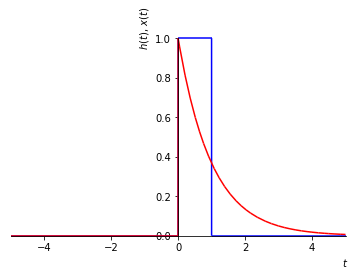

In [4]:
h = sym.exp(-t) * sym.Heaviside(t)
x = rect(t - 1/2)

plot_signals(t, x, h, r'$h(t)$, $x(t)$', r'$t$')

The **first step** is to substitute $t$ by $\tau$ to yield $h(\tau)$ and $x(\tau)$. Note, the horizontal axis of the plot represents now $\tau$

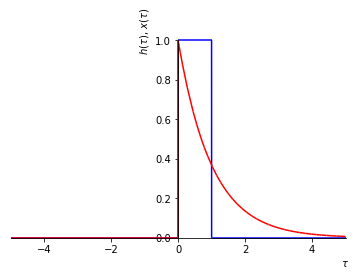

In [5]:
h1 = h.subs(t, tau)
x1 = x.subs(t, tau)

plot_signals(tau, x1, h1, r'$h(\tau)$, $x(\tau)$', r'$\tau$')

The **second step** is to time-reverse $h(\tau)$ to yield $h(-\tau)$

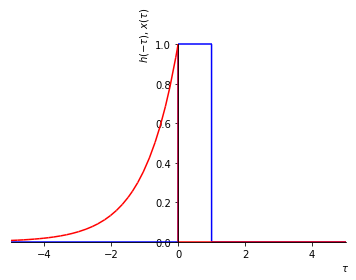

In [6]:
h2 = h1.subs(tau, -tau)

plot_signals(tau, x1, h2, r'$h(-\tau)$, $x(\tau)$', r'$\tau$')

The impulse response $h(-\tau)$ is shifted by $t$ to the right in the **third step** to yield $h(t - \tau)$. This is illustrated for $t = -2$

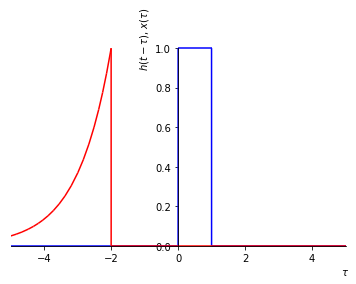

In [7]:
h3 = h2.subs(tau, tau-t)

plot_signals(tau, x1, h3.subs(t, -2), r'$h(t-\tau)$, $x(\tau)$', r'$\tau$')

It now becomes obvious that we have to consider three cases with respect to the overlap of $h(t-\tau)$ and $x(\tau)$

1. $t<0$: no overlap
2. $0 \leq t < 1$: partial overlap
3. $t > 0$: full overlap

The **fourth step**, the evaluation of the convolution integrals for the three cases is left open as an exercise. Note, since in the first case no overlap occurs $y(t) = 0$ for $t<0$.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.